In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"/home/shantaram/RAM/ML/Kaggle Dataset/Benguluru House Price/archive/banglore.csv")
data.shape

(13320, 9)

In [3]:
data.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
data.tail()

area_type   availability               location       size  \
13315        Built-up  Area  Ready To Move             Whitefield  5 Bedroom   
13316  Super built-up  Area  Ready To Move          Richards Town      4 BHK   
13317        Built-up  Area  Ready To Move  Raja Rajeshwari Nagar      2 BHK   
13318  Super built-up  Area         18-Jun        Padmanabhanagar      4 BHK   
13319  Super built-up  Area  Ready To Move           Doddathoguru      1 BHK   

       society total_sqft  bath  balcony  price  
13315  ArsiaEx       3453   4.0      0.0  231.0  
13316      NaN       3600   5.0      NaN  400.0  
13317  Mahla T       1141   2.0      1.0   60.0  
13318  SollyCl       4689   4.0      1.0  488.0  
13319      NaN        550   1.0      1.0   17.0

In [5]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
def value_count(df):
  for var in df.columns:
        print(f"---------------{var}-----------------")
        print(df[var].value_counts())

In [9]:
value_count(df)

---------------area_type-----------------
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
---------------availability-----------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jul               1
14-Nov               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
---------------location-----------------
Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
                        ... 
SK Garden                  1
Neelasandra                1
7th Block Koramangala      1
S R Layout                 1
RK Layout 2nd Stage        1
Name: location, Length: 1305, dtype: int64
---------------size-----------------
2 BHK         5199
3 BHK     

<AxesSubplot:>

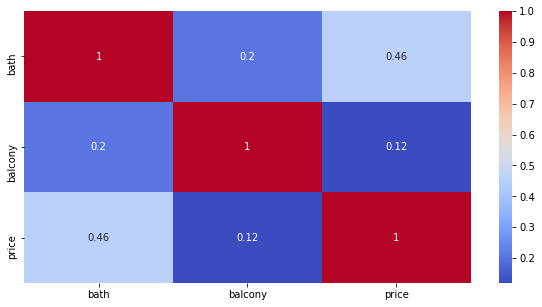

In [10]:
plt.figure(figsize = (10,5))
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

# Data cleaning

In [11]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
data.isnull().sum()* 100/df.shape[0]

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<AxesSubplot:>

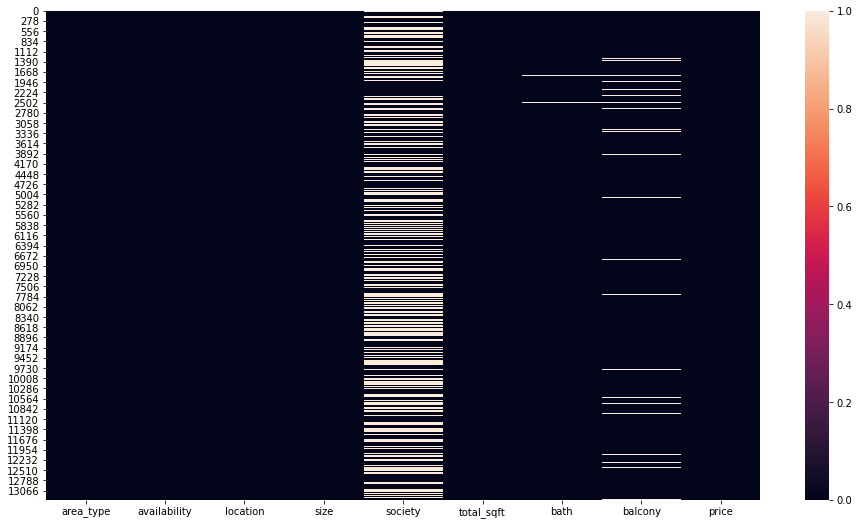

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [14]:
null_var = data.isnull().sum()* 100/df.shape[0]
null_var

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [15]:
drop_columns  = null_var[null_var >41].keys()
df2 = data.drop(columns = drop_columns)
df2.shape

(13320, 8)

# Filling Null values in Balcony Column using Mean value of Column

In [16]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [17]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [18]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [19]:
df3.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00

# Feature Engineering

In [20]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [21]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
1075                  66
3000                  66
1020                  63
2500                  62
1550                  60
1125                  60
1160                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [22]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) 
    except:
      total_sqft_int.append(np.nan)

In [23]:
# reset the index of dataframe
df4 = df3.reset_index(drop=True)

In [24]:
# Joining newley created column of total_sqft_int
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  total_sqft_int  
0       1056   2.0      1.0   39.07          1056.0  
1       2600   5.0      3.0  120.00          2600.0  
2       1440   2.0      3.0   62.00          1440.0  
3       1521   3.0      1.0   95.00          1521.0  
4       1200   2.0      1.0   51.00          1200.0

In [25]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [26]:
df6 = df5.dropna()
df6.shape

(13200, 9)

In [27]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


# Now for column "size"

In [28]:
df6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
10 BHK           2
11 BHK           2
11 Bedroom       2
12 Bedroom       1
14 BHK           1
43 Bedroom       1
19 BHK           1
27 BHK           1
16 BHK           1
18 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [29]:
#  2 BHK = 2 Bedroom == 2 RK
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [30]:
df6 = df6.reset_index(drop=True)

In [31]:
# Joining newley created column of size_int
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [32]:
df7.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  total_sqft_int  bhk  
0       1056   2.0      1.0   39.07          1056.0    2  
1       2600   5.0      3.0  120.00          2600.0    4  
2       1440   2.0      3.0   62.00          1440.0    3  
3       1521   3.0      1.0   95.00          1521.0    3  
4       1200   2.0      1.0   51.00          1200.0    2

# Finding Outlier and Removing

In [33]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

--------------------bath----------------------


/home/shantaram/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


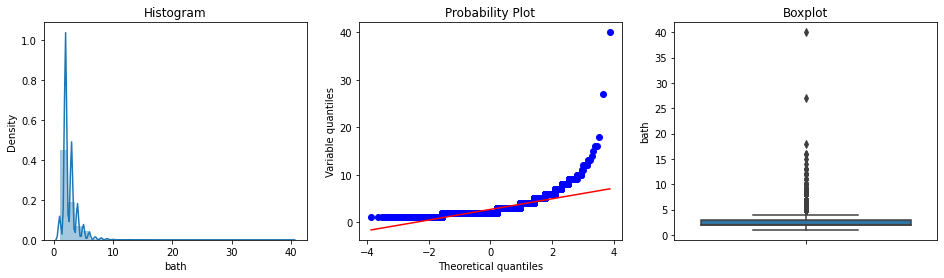

--------------------balcony----------------------


/home/shantaram/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


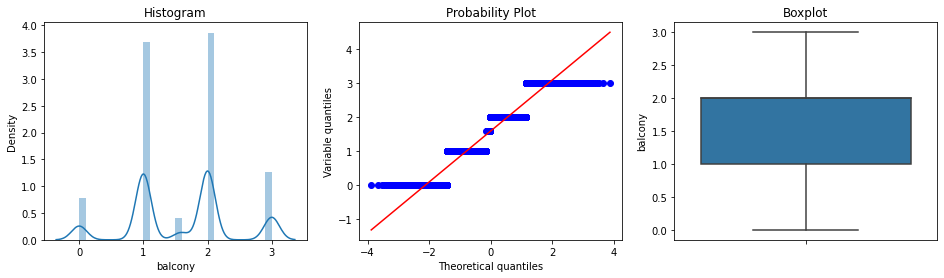

--------------------total_sqft_int----------------------


/home/shantaram/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


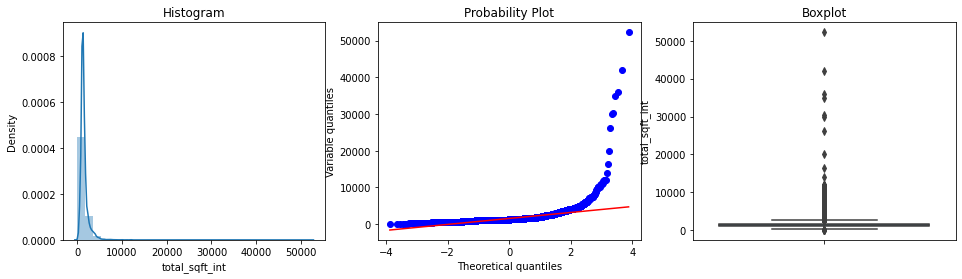

--------------------bhk----------------------


/home/shantaram/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


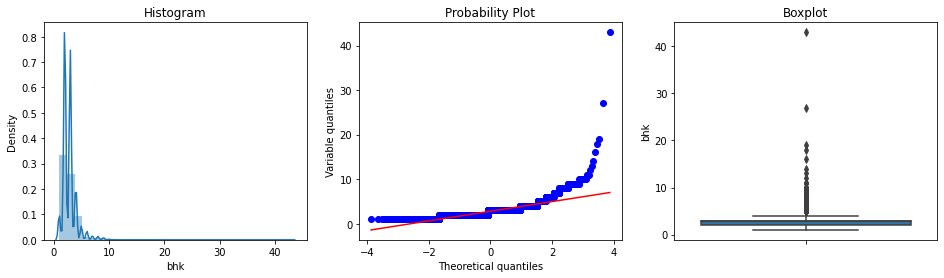

--------------------price----------------------


/home/shantaram/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


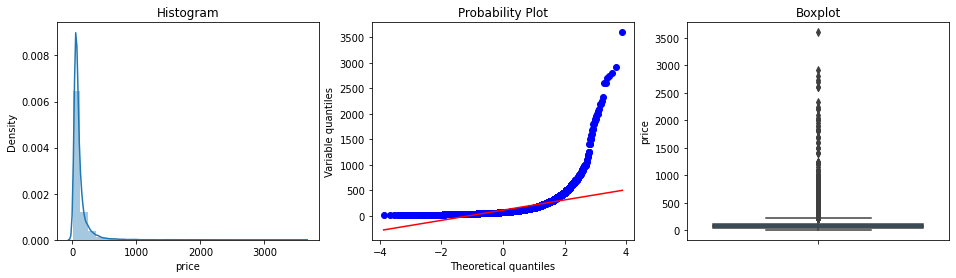

In [34]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var1 in num_var:
  print(f"--------------------{var1}----------------------")
  diagnostic_plots(df7, var1)


In [35]:
# here we consider  1 BHK requierd min 350 sqft are
df7[df7['total_sqft_int']/df7['bhk'] < 350].head()


area_type   availability         location       size  \
9             Plot  Area  Ready To Move     Gandhi Bazar  6 Bedroom   
26  Super built-up  Area  Ready To Move  Electronic City      2 BHK   
29  Super built-up  Area  Ready To Move  Electronic City      3 BHK   
45            Plot  Area  Ready To Move       HSR Layout  8 Bedroom   
57            Plot  Area  Ready To Move    Murugeshpalya  6 Bedroom   

   total_sqft  bath   balcony  price  total_sqft_int  bhk  
9        1020   6.0  1.584376  370.0          1020.0    6  
26        660   1.0  1.000000   23.1           660.0    2  
29       1025   2.0  1.000000   47.0          1025.0    3  
45        600   9.0  1.584376  200.0           600.0    8  
57       1407   4.0  1.000000  150.0          1407.0    6

In [36]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [37]:
# create new feature that is price per squre foot 
# it help to find the outliers

#price in lakh so conver into rupee and then / by total_sqft_int
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()

<ipython-input-37-a88fdd7593d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  total_sqft_int  bhk  price_per_sqft  
0       1056   2.0      1.0   39.07          1056.0    2     3699.810606  
1       2600   5.0      3.0  120.00          2600.0    4     4615.384615  
2       1440   2.0      3.0   62.00          1440.0    3     4305.555556  
3       1521   3.0      1.0   95.00          1521.0    3     6245.890861  
4       1200   2.0      1.0   51.00          1200.0    2     4250.000000

In [38]:
df8.price_per_sqft.describe()

#here we can see huge difference between min and max price_per_sqft
# min 267.829813 max 176470.588235

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

df9 = remove_pps_outliers(df8)
df9.shape

(8888, 11)

In [42]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

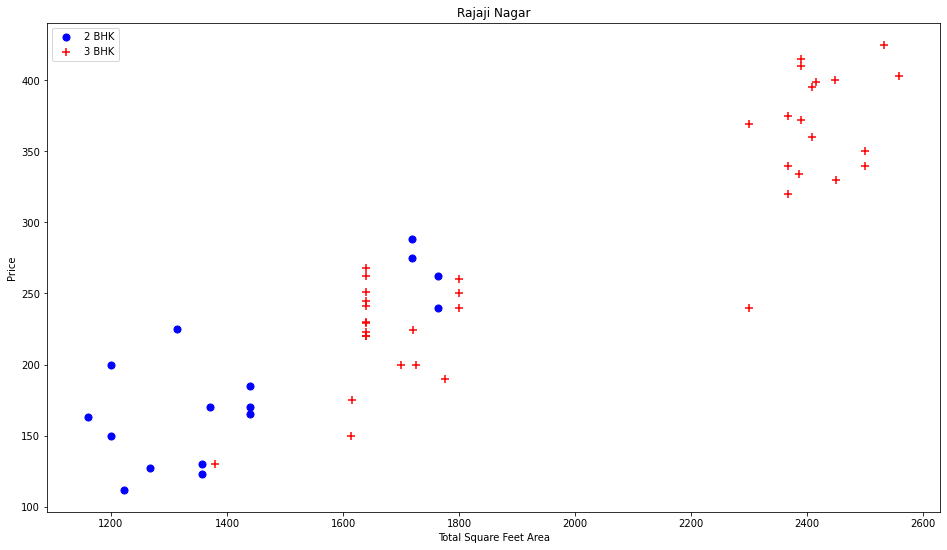

In [43]:
plot_scatter_chart(df9, "Rajaji Nagar")

# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

In [ ]:
plot_scatter_chart(df9, "Hebbal")
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

In [ ]:
# Removing BHK outliers
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

In [ ]:
df10 = remove_bhk_outliers(df9)
df10.shape

In [ ]:
plot_scatter_chart(df10, "Hebbal")
# In below scatter plot most of the red data point remove fron blue points

# Remove outliers using the help of 'bath' feature

In [ ]:
df10.bath.unique()

In [ ]:
df10[df10.bath > df10.bhk+2]

In [ ]:
# here we are considering data only total no. bathroom =  bhk + 1
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

In [ ]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(df11[var])

In [ ]:
df11.head()

In [ ]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()

In [ ]:
df12.to_csv("clean_data.csv", index=False) # test ml model on this data
# ML model train on this data and got best score >>>> XGBoost=0.914710

# Categorical Variable Encoding

In [ ]:
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()

In [ ]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape

In [ ]:
df14.head()

In [ ]:
df14.to_csv('oh_encoded_data.csv', index=False) # test ml model on this data

# Working on <<<<<< area_type >>>>> feature

In [ ]:
df13['area_type'].value_counts()

In [ ]:
df15 = df13.copy()
# appy Ohe-Hot  encoding on 'area_type' feature
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape

In [ ]:
df15.head(2)

# Working with <<<<< availability >>>>> Feature

In [ ]:
df15["availability"].value_counts()

In [ ]:
# in availability feature, 10525 house 'Ready to Move" and remaining will be redy on perticuler date
# so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

In [ ]:
df15.tail()

# Working on <<<< Location >>>> feature

In [ ]:
location_value_count = df15['location'].value_counts()
location_value_count

In [ ]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

In [ ]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape

In [ ]:
df16.head()

# Drop categorical variable as we created new one

In [ ]:
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape

In [ ]:
df17.head()

In [ ]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False)

In [ ]:
df17.shape

In [ ]:
df17.isnull().sum()

In [ ]:
X = df17.drop(columns = ["price"])
y = df17["price"]
print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
ler = LinearRegression()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [ ]:
print("X_train.shape : ",X_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ler.fit(X_train,y_train)

In [ ]:
ler.coef_

In [ ]:
ler.intercept_

In [ ]:
ler.score(X_train,y_train)

In [ ]:
ler.score(X_test,y_test)

In [ ]:
y_pred=ler.predict(X_test)

In [ ]:
prediction_data = pd.DataFrame(y_pred)
prediction_data.tail(5)

In [ ]:
y_test.tail(5)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score
r_squared = r2_score(y_test, y_pred)
r_squared

In [ ]:
plt.scatter(y_pred,y_test)

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
lar = Ridge(alpha=100)
lar.fit(X_train,y_train)
lar.score(X_test,y_test)

In [ ]:
las = Lasso(alpha=10)
las.fit(X_train,y_train)
coe1 = las.coef_
int1 = las.intercept_
pre1 = las.score(X_test,y_test)
pre1